In [84]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [85]:
# Set parameters
nx = 41
L = 2.0
dx = L / (nx - 1)

nu = 0.3
sigma = 0.5
dt = sigma * dx ** 2 / nu
nt = 20

In [86]:
x = numpy.linspace(0.0, L, num = nx)

In [87]:
u0 = numpy.ones(nx)
mask = numpy.where((x>=0.5)&(x<=1.0))
u0[mask] = 2.0

In [88]:
u =u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = u[i] + sigma * (un[i-1] - 2 * un[i] + un[i+1])
    #u[0] = 1.0
    #u[-1] = 1.0

u_naive = u

In [89]:
u = u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma * (u[:-2] - 2 * un[1:-1] + un[2:])

In [90]:
numpy.allclose(u_naive,u)

True

In [91]:
def diffusion(u0, sigma = 0.5, nt = 20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma * (u[:-2] - 2 * un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [92]:
u_hist = diffusion(u0, sigma = sigma, nt = nt)

In [93]:
len(u_hist)

21

In [94]:
def plot_solution(n, u_hist, x):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('y')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label = 'initial')
    pyplot.plot(x, u_hist[n], label = 'Current')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

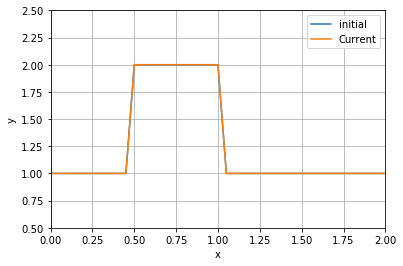

In [95]:
plot_solution(0, u_hist, x)

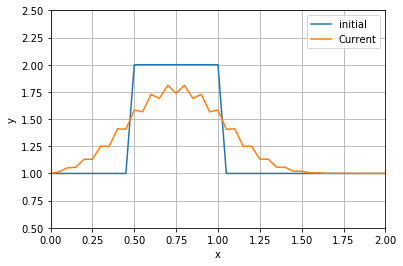

In [96]:
plot_solution(-1, u_hist, x)

In [97]:
import ipywidgets

In [98]:
nt_slider = ipywidgets.IntSlider(value = 0, min=0, max = nt, step = 1, description = 'Time step')
w = ipywidgets.interactive(plot_solution,
                           n = nt_slider, u_hist = ipywidgets.fixed(u_hist),x= ipywidgets.fixed(x))

In [1]:
display(w)

NameError: name 'w' is not defined